In [1]:
# Set up environment
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()

In [2]:
# Get stock price data in dataframe
aapl = yf.download("AAPL")
aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12 00:00:00-05:00,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1980-12-15 00:00:00-05:00,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1980-12-16 00:00:00-05:00,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
1980-12-17 00:00:00-05:00,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
1980-12-18 00:00:00-05:00,0.118862,0.119420,0.118862,0.118862,0.092492,73449600


<AxesSubplot:xlabel='Date'>

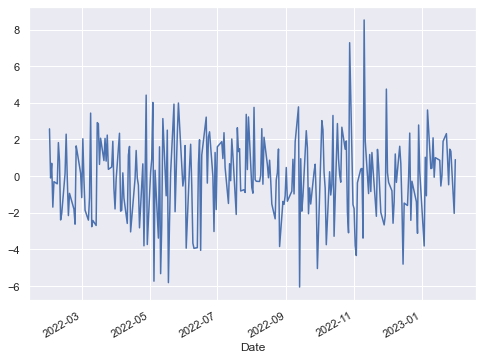

In [3]:
# Get instantaneous rate of return
aapl_close = aapl['Close']
aapl_return = round(np.log(aapl_close).diff()*100, 2)
aapl_return[-252:].plot()

In [4]:
aapl_return.dropna(inplace = True) # omit not available values
aapl_return.describe()


count    10622.000000
mean         0.066125
std          2.869430
min        -73.120000
25%         -1.320000
50%          0.000000
75%          1.460000
max         28.690000
Name: Close, dtype: float64

In [5]:
from scipy import stats
n, minmax, mean, var, skew, kert = stats.describe(aapl_return)
std = var ** 0.5
minmax
mini,maxi = minmax

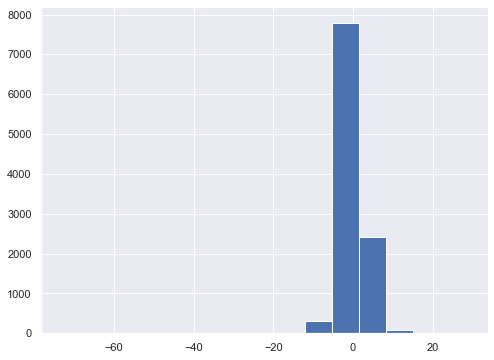

In [6]:
plt.hist(aapl_return, bins = 15);

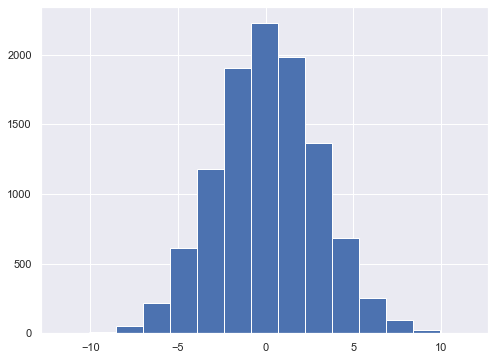

In [7]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)
plt.hist(x, bins = 15);

In [8]:
x_test = stats.kurtosistest(x)
aapl_test = stats.kurtosistest(aapl_return)
print(f'{"    Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AAPL: {aapl_test[0]:13.2f}{aapl_test[1]:16.4f}")

    Test statistic          p-value
     ------------------------------
x:             1.35          0.1761
AAPL:         58.88          0.0000


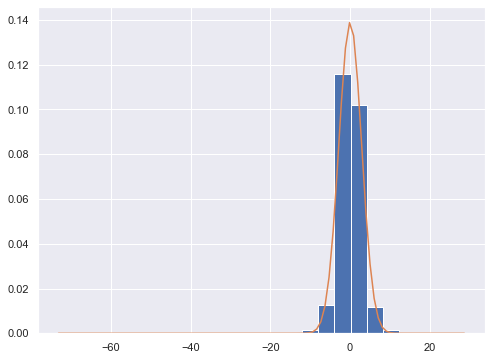

In [9]:
plt.hist(aapl_return, bins = 25, edgecolor = 'w', density = True)
overlay = np.linspace(mini, maxi, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std)); # Price change can be described as normally distributed - No

In [10]:
stats.ttest_1samp(aapl_return.sample(252), 0, alternative = 'two-sided')

Ttest_1sampResult(statistic=-1.313633086155845, pvalue=0.19016915209665794)

In [11]:
aapl_close = pd.DataFrame(aapl_close, columns = ['Close'])
aapl_close['lag_1'] = aapl_close.Close.shift(1)
aapl_close['lag_2'] = aapl_close.Close.shift(2)
aapl_close.dropna(inplace = True)
aapl_close.head()

,Close,lag_1,lag_2
Date,,,
1980-12-16 00:00:00-05:00,0.112723,0.121652,0.128348
1980-12-17 00:00:00-05:00,0.115513,0.112723,0.121652
1980-12-18 00:00:00-05:00,0.118862,0.115513,0.112723
1980-12-19 00:00:00-05:00,0.126116,0.118862,0.115513
1980-12-22 00:00:00-05:00,0.132254,0.126116,0.118862


In [12]:
# Linear regression model
lr = np.linalg.lstsq(aapl_close[['lag_1', 'lag_2']], aapl_close.Close, rcond = None)[0]

In [13]:
aapl_close['predict'] = np.dot(aapl_close[['lag_1', 'lag_2']], lr)
aapl_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
1980-12-16 00:00:00-05:00,0.112723,0.121652,0.128348,0.122079
1980-12-17 00:00:00-05:00,0.115513,0.112723,0.121652,0.113268
1980-12-18 00:00:00-05:00,0.118862,0.115513,0.112723,0.115415
1980-12-19 00:00:00-05:00,0.126116,0.118862,0.115513,0.118735
1980-12-22 00:00:00-05:00,0.132254,0.126116,0.118862,0.125778


<AxesSubplot:xlabel='Date'>

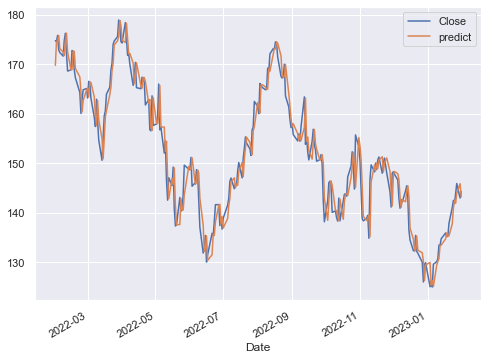

In [14]:
aapl_close.iloc[-252:][['Close', 'predict']].plot()